Kaggle dataset : https://www.kaggle.com/datasets/yasserhessein/thyroid-disease-data-set

## Thyroid Disease Prediction 

In [198]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [199]:
df =pd.read_csv("data/hypothyroid_raw.csv")
df.head(100)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,26,F,f,f,f,f,f,f,f,f,...,t,137,t,1.63,t,84,f,?,other,P
96,59,?,f,f,f,f,f,f,f,f,...,t,92,t,0.93,t,99,f,?,SVI,P
97,39,F,f,f,t,f,f,f,f,f,...,t,135,t,1.51,t,89,f,?,other,P
98,69,F,f,f,f,f,f,f,f,f,...,t,123,t,0.91,t,136,f,?,SVI,P


In [200]:
df.shape

(3772, 30)

# Duplicate check

In [201]:
df.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
binaryClass                  0
dtype: int64

# No duplicates found

# Describe

In [202]:
df.describe()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,...,2,242,2,147,2,235,1,1,5,2
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,P
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,...,3541,231,3385,387,3387,385,3772,3772,2201,3481


# INFO

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

# Check for Null values

In [204]:
df.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
binaryClass                  0
dtype: int64

# There are Null values

In [205]:
for col in df.columns:
    print(col,'::',df[col].unique())

age :: ['41' '23' '46' '70' '18' '59' '80' '66' '68' '84' '67' '71' '28' '65'
 '42' '63' '51' '81' '54' '55' '60' '25' '73' '34' '78' '37' '85' '26'
 '58' '64' '44' '48' '61' '35' '83' '21' '87' '53' '77' '27' '69' '74'
 '38' '76' '45' '36' '22' '43' '72' '82' '31' '39' '49' '62' '57' '1' '50'
 '30' '29' '75' '19' '7' '79' '17' '24' '15' '32' '47' '16' '52' '33' '13'
 '10' '89' '56' '20' '90' '40' '88' '14' '86' '94' '12' '4' '11' '8' '5'
 '455' '2' '91' '6' '?' '93' '92']
sex :: ['F' 'M' '?']
on thyroxine :: ['f' 't']
query on thyroxine :: ['f' 't']
on antithyroid medication :: ['f' 't']
sick :: ['f' 't']
pregnant :: ['f' 't']
thyroid surgery :: ['f' 't']
I131 treatment :: ['f' 't']
query hypothyroid :: ['f' 't']
query hyperthyroid :: ['f' 't']
lithium :: ['f' 't']
goitre :: ['f' 't']
tumor :: ['f' 't']
hypopituitary :: ['f' 't']
psych :: ['f' 't']
TSH measured :: ['t' 'f']
TSH :: ['1.3' '4.1' '0.98' '0.16' '0.72' '0.03' '?' '2.2' '0.6' '2.4' '1.1' '2.8'
 '3.3' '12' '1.2' '1.5' '6' '2

# Convert dtypes as per the feature description mentioned in projct 

In [206]:
df.replace('?',np.nan,inplace=True)
df['age'].fillna(df['age'].median(),inplace=True)
df['sex'].fillna(df['sex'].mode()[0],inplace=True)
df['age']=df['age'].astype(int)
cols=['T3','TSH','TT4','TT4','T4U','FTI','TBG']
for col in cols:
    #df[col].unique()
    #print('col=',col)
    df[col].fillna(df[col].median(),inplace=True)
    #print(df[col].unique())
    df[col]=df[col].astype(float)
df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3772 non-null   int32  
 1   sex                        3772 non-null   object 
 2   on thyroxine               3772 non-null   object 
 3   query on thyroxine         3772 non-null   object 
 4   on antithyroid medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid surgery            3772 non-null   object 
 8   I131 treatment             3772 non-null   object 
 9   query hypothyroid          3772 non-null   object 
 10  query hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

c:\SUJITHKS\INTERNSHIP\Thyroid Duaease Prediction\ThyroidPrediction\thyro\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


# ' referral source ,TBG' Has no impact on the prediction ,so removed

In [207]:
df.drop(['referral source','TBG','TBG measured'],axis=1,inplace=True)

In [208]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,1.30,t,2.5,t,125.0,t,1.14,t,109.0,P
1,23,F,f,f,f,f,f,f,f,f,...,4.10,t,2.0,t,102.0,f,0.98,f,107.0,P
2,46,M,f,f,f,f,f,f,f,f,...,0.98,f,2.0,t,109.0,t,0.91,t,120.0,P
3,70,F,t,f,f,f,f,f,f,f,...,0.16,t,1.9,t,175.0,f,0.98,f,107.0,P
4,70,F,f,f,f,f,f,f,f,f,...,0.72,t,1.2,t,61.0,t,0.87,t,70.0,P


# Numerical Features

In [209]:
df_numerical=df.columns[df.dtypes!='object']
df_numerical

Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'], dtype='object')

# Categorical Features 

In [210]:
df_categoical=df.columns[df.dtypes=='object']
df_categoical

Index(['sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured',
       'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured',
       'binaryClass'],
      dtype='object')

#  Exploratory Data Analysis

# Detect  Outliers

# 1. Boxplot

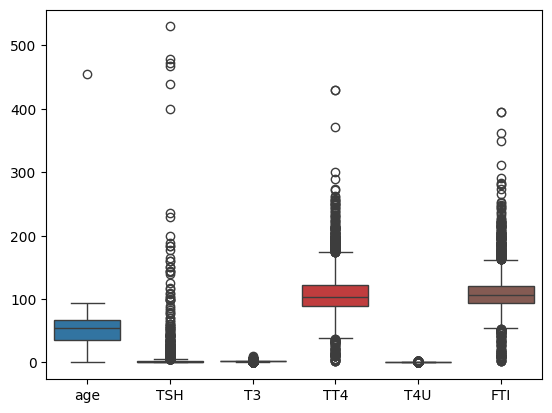

In [211]:
sns.boxplot(data=df)
plt.show()

# 2. Scatter Plot

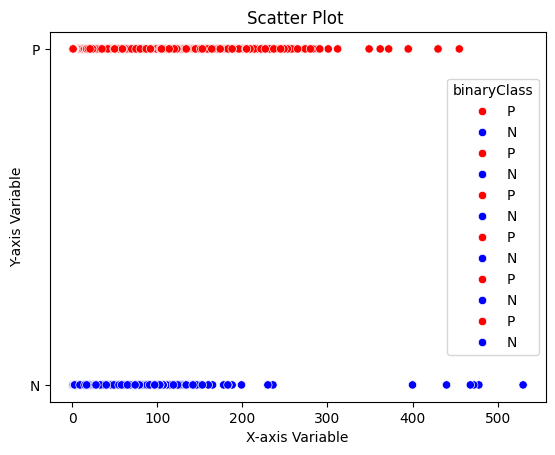

In [212]:

# Create scatter pl
for col in df_numerical:
    sns.scatterplot(x=col, y='binaryClass', hue='binaryClass', data=df, palette={'N': 'blue', 'P': 'red'})
    # Label the axes
    plt.xlabel('X-axis Variable')
    plt.ylabel('Y-axis Variable')

# Add a title
    plt.title('Scatter Plot ')

# Show the plot
   # plt.show()

# Handling Outliers

In [213]:
#TSH
"""
Q1 = df['TSH'].quantile(0.25)
Q3 = df['TSH'].quantile(0.75)
IQR = Q3 - Q1
print('IQR :',IQR)
outliers = ((df['TSH'] < (Q1 - 1.5 * IQR)) | (df['TSH'] > (Q3 + 1.5 * IQR)))#.any(axis=1)
print('Outliers are :')


df[outliers]

"""
# Define a function to replace outliers with the mean
def replace_outliers_with_mean(series, z_score_threshold=2.0):
    z_scores = np.abs((series - series.mean()) / series.std())
    is_outlier = z_scores > z_score_threshold
    series[is_outlier] = series.mean()
    return series

# Define a function to replace outliers with the median based on percentiles
def replace_outliers_with_percentile(series, lower_percentile=25, upper_percentile=75):
    lower_bound = series.quantile(lower_percentile / 100)
    upper_bound = series.quantile(upper_percentile / 100)
    
    series[(series < lower_bound) | (series > upper_bound)] = series.median()
    print('Meadian ',series.median())
    return series
df['TSH']=replace_outliers_with_percentile(df['TSH'])
df['TT4']=replace_outliers_with_percentile(df['TT4'])
df['FTI']=replace_outliers_with_percentile(df['FTI'])


Meadian  1.4
Meadian  103.0
Meadian  107.0


C:\Users\sujith.ks\AppData\Local\Temp\ipykernel_23944\4219143582.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[(series < lower_bound) | (series > upper_bound)] = series.median()
C:\Users\sujith.ks\AppData\Local\Temp\ipykernel_23944\4219143582.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[(series < lower_bound) | (series > upper_bound)] = series.median()
C:\Users\sujith.ks\AppData\Local\Temp\ipykernel_23944\4219143582.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [214]:
df.TSH.unique()



array([1.3 , 1.4 , 0.98, 0.72, 2.2 , 0.6 , 2.4 , 1.1 , 1.2 , 1.5 , 2.1 ,
       0.8 , 1.9 , 1.7 , 1.8 , 0.99, 0.92, 0.64, 1.  , 2.  , 1.6 , 0.61,
       2.3 , 0.94, 0.88, 0.68, 0.7 , 0.67, 0.75, 0.77, 0.9 , 0.65, 0.83,
       0.62, 0.76, 0.66, 0.79, 0.86, 0.84, 0.87, 0.74, 0.89, 0.93, 0.97,
       0.85, 0.73, 0.78, 0.63, 0.95, 0.81, 0.91, 1.01, 0.82, 0.69, 0.96,
       0.71, 1.02])

In [215]:
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,1.30,t,2.5,t,103.0,t,1.14,t,109.0,P
1,23,F,f,f,f,f,f,f,f,f,...,1.40,t,2.0,t,102.0,f,0.98,f,107.0,P
2,46,M,f,f,f,f,f,f,f,f,...,0.98,f,2.0,t,109.0,t,0.91,t,120.0,P
3,70,F,t,f,f,f,f,f,f,f,...,1.40,t,1.9,t,103.0,f,0.98,f,107.0,P
4,70,F,f,f,f,f,f,f,f,f,...,0.72,t,1.2,t,103.0,t,0.87,t,107.0,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,1.40,f,2.0,f,103.0,f,0.98,f,107.0,P
3768,68,F,f,f,f,f,f,f,f,f,...,1.00,t,2.1,t,103.0,t,1.08,t,114.0,P
3769,74,F,f,f,f,f,f,f,f,f,...,1.40,t,1.8,t,112.0,t,1.07,t,105.0,P
3770,72,M,f,f,f,f,f,f,f,f,...,0.70,t,2.0,t,103.0,t,0.94,t,107.0,P


# After Handling Outliers

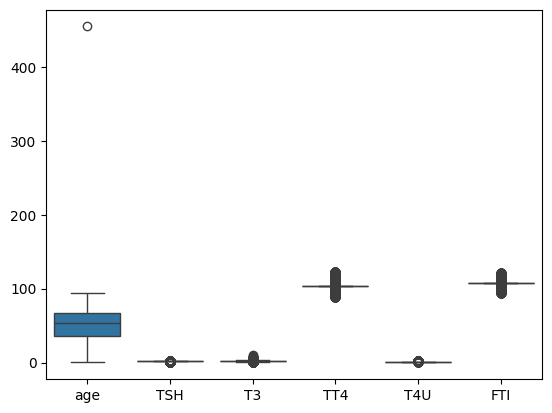

In [216]:
sns.boxplot(data=df)
plt.show()

#  Correlation

In [217]:
df[df_numerical].corr()

,age,TSH,T3,TT4,T4U,FTI
age,1.000000,-0.022056,-0.214400,0.039369,-0.155405,0.029172
TSH,-0.022056,1.000000,-0.008714,-0.016094,0.001205,-0.020981
T3,-0.214400,-0.008714,1.000000,0.048095,0.407247,-0.029163
TT4,0.039369,-0.016094,0.048095,1.000000,0.114409,0.170117
T4U,-0.155405,0.001205,0.407247,0.114409,1.000000,-0.029498
FTI,0.029172,-0.020981,-0.029163,0.170117,-0.029498,1.000000


<Figure size 3000x3000 with 0 Axes>

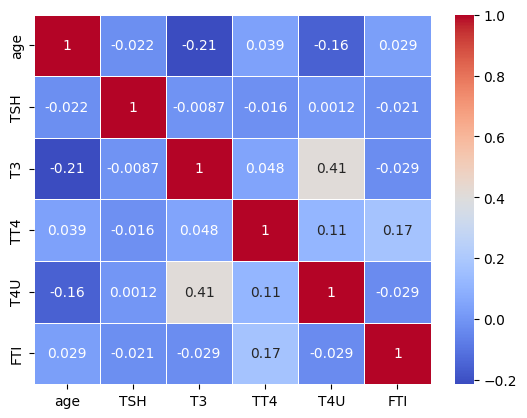

<Figure size 3000x3000 with 0 Axes>

In [218]:
sns.heatmap(df[df_numerical].corr(),annot=True, cmap='coolwarm', linewidths=.5)
plt.figure(figsize=(30,30))

# 'TT & FTI' higly correlated ,so we can remove one of them 

In [219]:
df.drop(['FTI','FTI measured'],axis=1,inplace=True)
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,f,t,1.30,t,2.5,t,103.0,t,1.14,P
1,23,F,f,f,f,f,f,f,f,f,...,f,t,1.40,t,2.0,t,102.0,f,0.98,P
2,46,M,f,f,f,f,f,f,f,f,...,f,t,0.98,f,2.0,t,109.0,t,0.91,P
3,70,F,t,f,f,f,f,f,f,f,...,f,t,1.40,t,1.9,t,103.0,f,0.98,P
4,70,F,f,f,f,f,f,f,f,f,...,f,t,0.72,t,1.2,t,103.0,t,0.87,P


# Re calculate numerical & categorical

In [220]:
df_categoical=df.columns[df.dtypes=='object']
df.info()
df_numerical=df.columns[df.dtypes!='object']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3772 non-null   int32  
 1   sex                        3772 non-null   object 
 2   on thyroxine               3772 non-null   object 
 3   query on thyroxine         3772 non-null   object 
 4   on antithyroid medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid surgery            3772 non-null   object 
 8   I131 treatment             3772 non-null   object 
 9   query hypothyroid          3772 non-null   object 
 10  query hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

# Hist plot

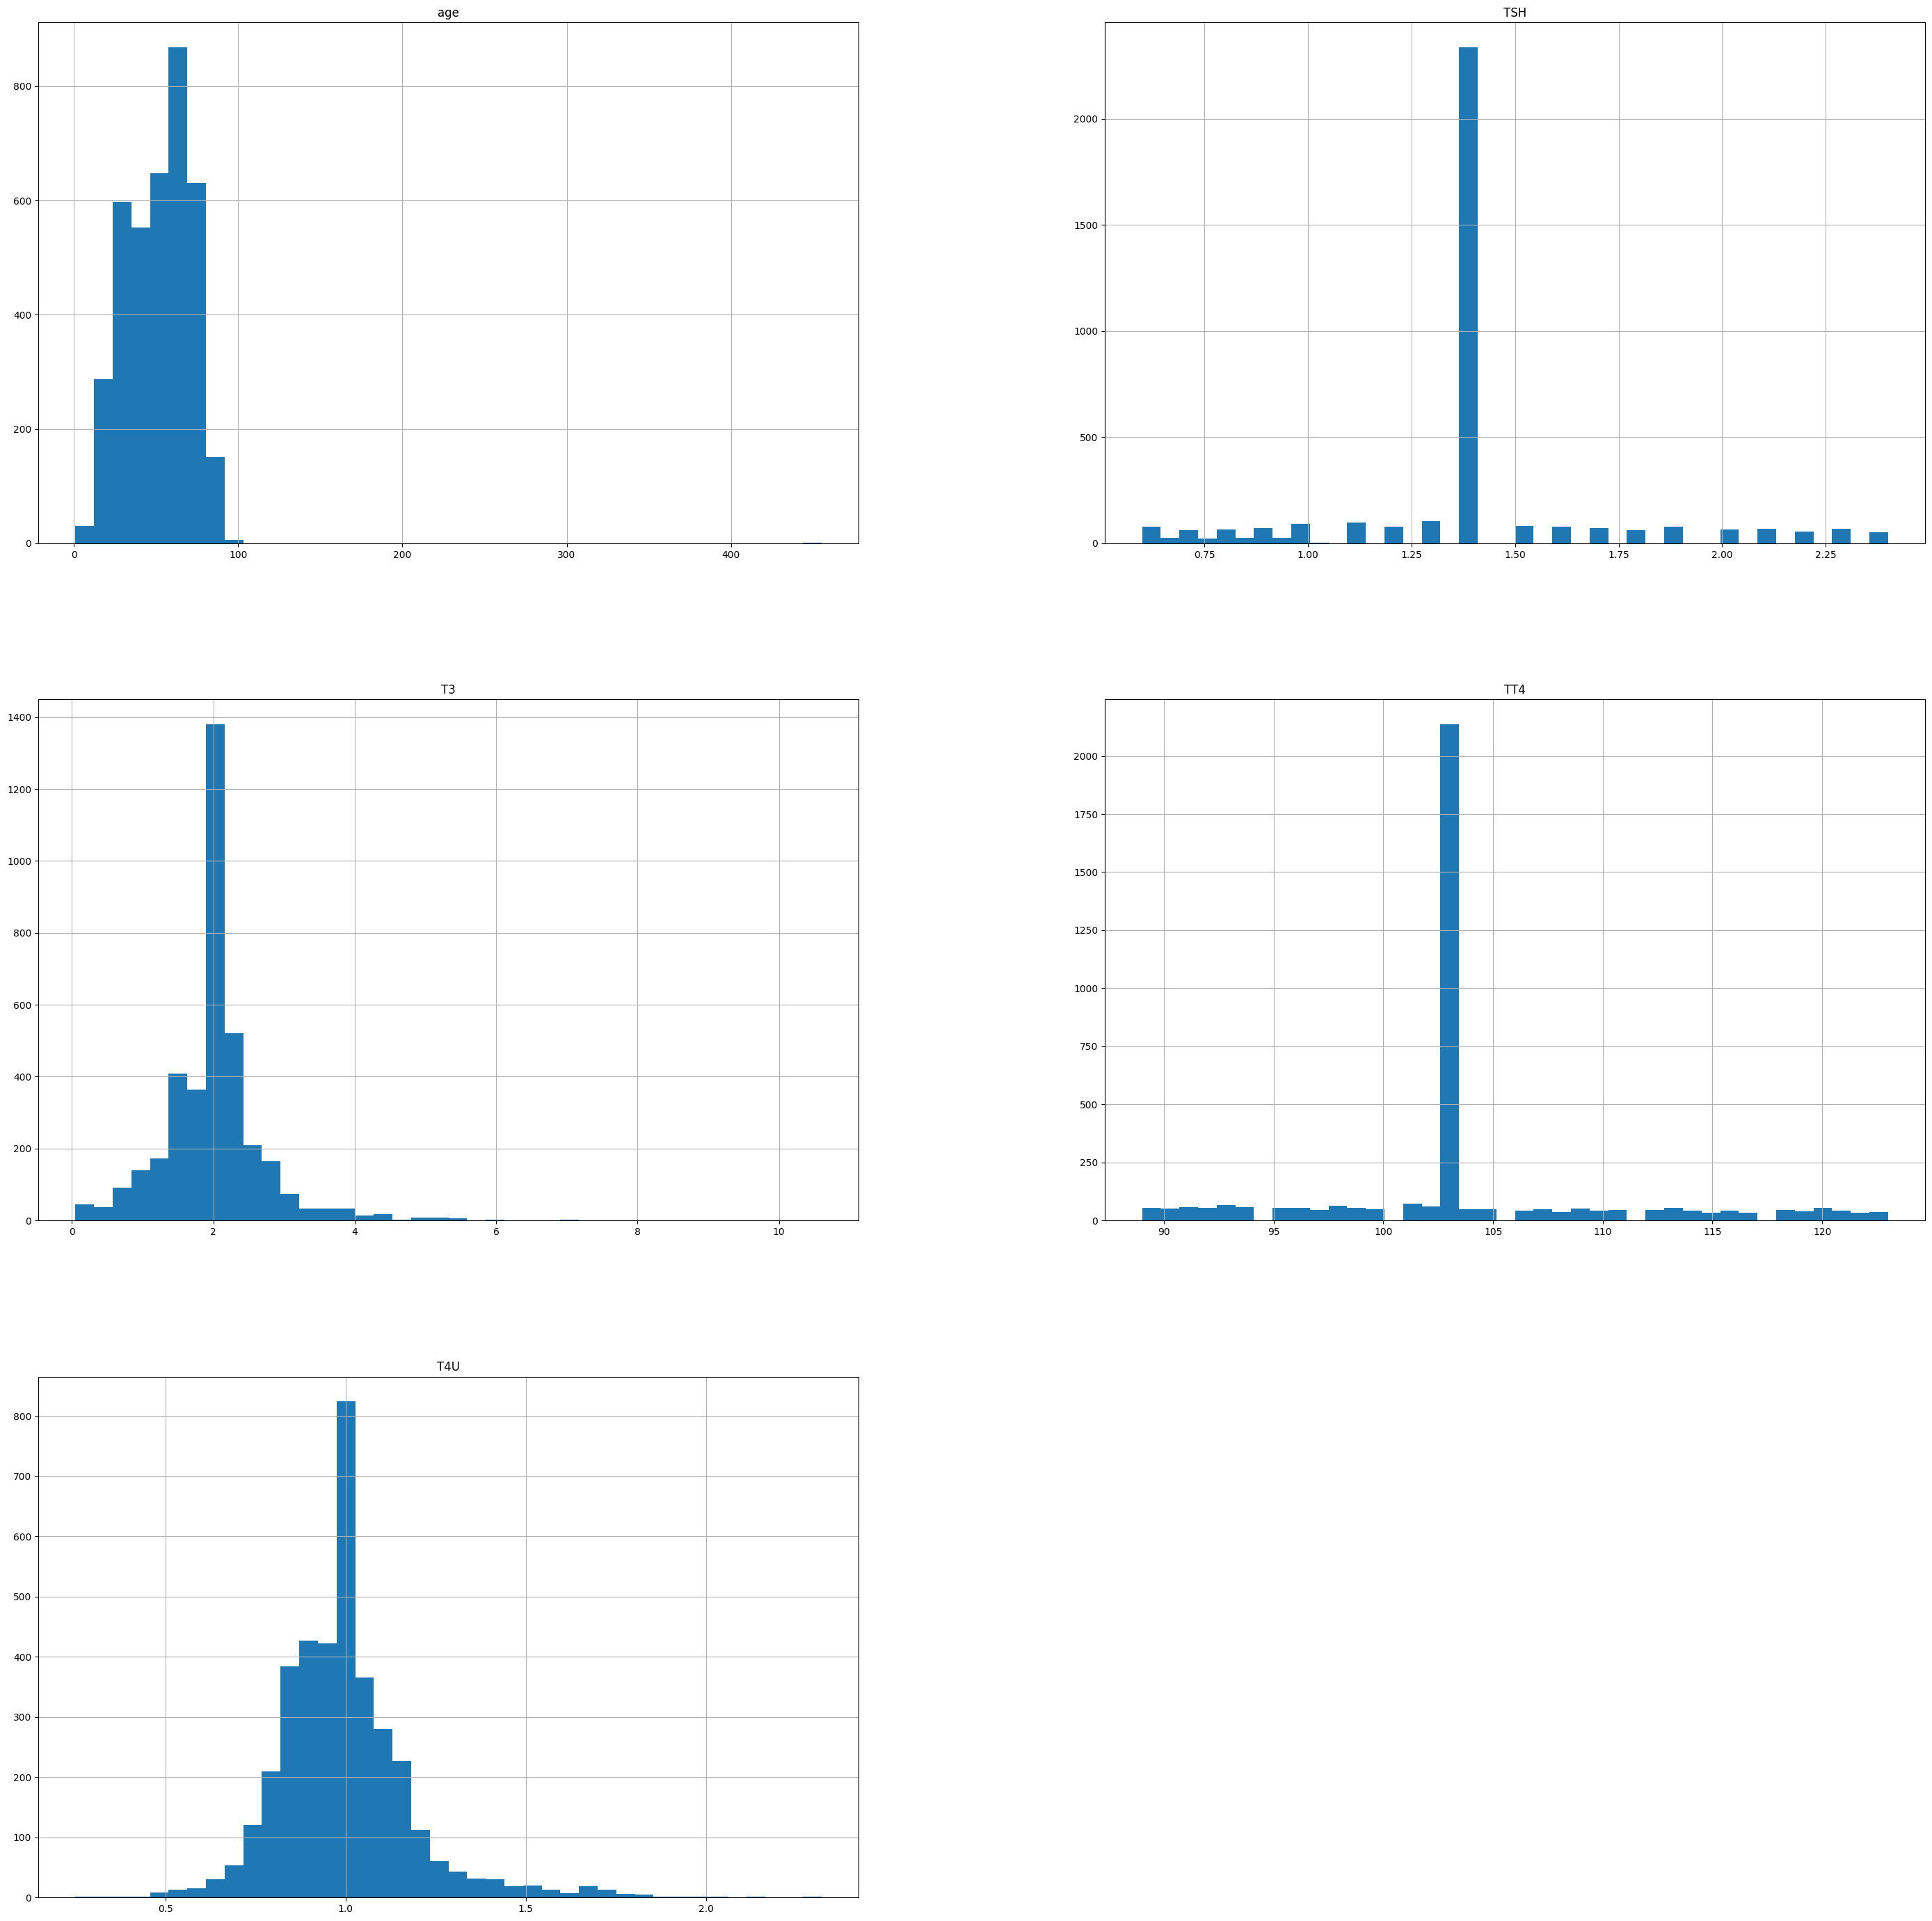

In [221]:
df.hist(bins=40,figsize=(35,35));
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder



In [222]:
ordinal_encoder = OrdinalEncoder()
df['binaryClass'] = ordinal_encoder.fit_transform(df['binaryClass'].to_numpy().reshape(-1,1))
df.to_csv("data/thyroid_clean.csv")
df['binaryClass'].head()
df['binaryClass'] .unique()

array([1., 0.])

# Independend Featutes - X

In [223]:
X=df.drop(['binaryClass'],axis=1)
X.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U
0,41,F,f,f,f,f,f,f,f,f,...,f,f,t,1.30,t,2.5,t,103.0,t,1.14
1,23,F,f,f,f,f,f,f,f,f,...,f,f,t,1.40,t,2.0,t,102.0,f,0.98
2,46,M,f,f,f,f,f,f,f,f,...,f,f,t,0.98,f,2.0,t,109.0,t,0.91
3,70,F,t,f,f,f,f,f,f,f,...,f,f,t,1.40,t,1.9,t,103.0,f,0.98
4,70,F,f,f,f,f,f,f,f,f,...,f,f,t,0.72,t,1.2,t,103.0,t,0.87


# Independend Featutes - y

In [224]:
y=df['binaryClass']
y.unique()

array([1., 0.])

# Recalculate categorical & numerical

In [225]:
df_categorical=X.columns[X.dtypes=='object']
X.info()
df_numerical=X.columns[X.dtypes!='object']
df_numerical
df_categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3772 non-null   int32  
 1   sex                        3772 non-null   object 
 2   on thyroxine               3772 non-null   object 
 3   query on thyroxine         3772 non-null   object 
 4   on antithyroid medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid surgery            3772 non-null   object 
 8   I131 treatment             3772 non-null   object 
 9   query hypothyroid          3772 non-null   object 
 10  query hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

Index(['sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured',
       'T3 measured', 'TT4 measured', 'T4U measured'],
      dtype='object')

# Label Encoding

In [226]:
label_encoder = LabelEncoder()

In [227]:
print('Total feature  len=',len(X.columns))
print('Categorical feature  len=',len(df_categorical))
print('Numerical feature len=',len(df_numerical))
df_categorical

Total feature  len= 24
Categorical feature  len= 19
Numerical feature len= 5


Index(['sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured',
       'T3 measured', 'TT4 measured', 'T4U measured'],
      dtype='object')

In [228]:
label_encoder = LabelEncoder()
label_encoders = {}

for column in df_categorical:
    print('colum:',column)#,' uniq:',X[column].unique()) 
    
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])
 
  
    label_encoder = LabelEncoder()   
    y=label_encoder.fit_transform(y) 
   

  


colum: sex
colum: on thyroxine
colum: query on thyroxine
colum: on antithyroid medication
colum: sick
colum: pregnant
colum: thyroid surgery
colum: I131 treatment
colum: query hypothyroid
colum: query hyperthyroid
colum: lithium
colum: goitre
colum: tumor
colum: hypopituitary
colum: psych
colum: TSH measured
colum: T3 measured
colum: TT4 measured
colum: T4U measured


# Pre processing,Model,prediction,Accuracy

In [229]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score

In [230]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=42)

In [231]:
y_train
X_train

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U
1616,34,0,0,0,0,0,0,0,0,1,...,0,0,1,0.6,1,2.3,1,103.0,1,1.05
2110,35,1,0,0,0,0,0,0,0,0,...,0,0,1,1.2,1,2.7,1,103.0,1,1.19
3683,21,0,0,0,0,0,0,0,0,0,...,0,0,0,1.4,0,2.0,0,103.0,0,0.98
1163,14,1,0,0,0,0,0,0,0,0,...,0,0,1,1.4,0,2.0,1,91.0,1,0.93
942,58,0,0,0,0,0,0,0,0,0,...,0,0,1,1.4,0,2.0,1,115.0,1,1.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,60,0,0,0,0,0,0,0,0,0,...,0,0,1,2.1,0,2.0,1,103.0,1,1.01
1294,25,0,0,0,0,0,0,0,0,0,...,0,0,1,0.7,1,1.6,1,94.0,1,0.93
860,65,0,1,0,0,0,0,0,0,0,...,0,0,1,1.4,1,3.1,1,103.0,1,0.98
3507,73,0,1,0,0,0,0,0,0,1,...,0,0,1,1.4,1,1.7,1,103.0,1,0.89


# 1.Linear regression Estimator

In [232]:
model= LinearRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)
score=r2_score(y_test,pred)
score

0.07444898390955779

# 2.Decision tree classifier

In [233]:
model = DecisionTreeClassifier(max_depth=3)

# Train the classifier on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Score : {accuracy}")#" * 100:.2f}%")

Score : 0.9319787985865724


# Random Forest Classifier

In [234]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Score: {accuracy}")# * 100:.2f}%")

Score: 0.9346289752650176


# KNeighborsClassifier

In [235]:
model = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.911660777385159


# SVM

In [236]:
model = SVC(kernel='linear', C=1.0)

# Train the classifier on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9284452296819788
